# Assignment 07_Clustering_Q1_CrimeData

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.<br/>

Data Description:<br/>
Murder -- Muder rates in different places of United States<br/>
Assualt- Assualt rate in different places of United States<br/>
UrbanPop - urban population in different places of United States<br/>
Rape - Rape rate in different places of United States<br/>


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [136]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [137]:
crime.shape

(50, 5)

In [138]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [139]:
crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


## Using Normalization function 

In [140]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [141]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Hierarchical Clustering Dendrogram

### Single Linkage

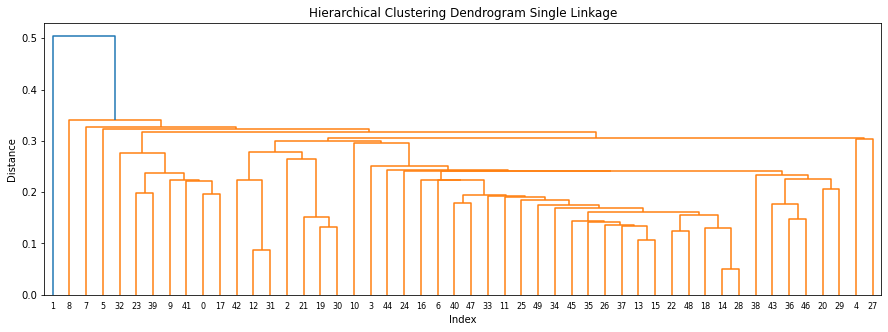

In [143]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram Single Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
)
plt.show()

## Complete Linkage

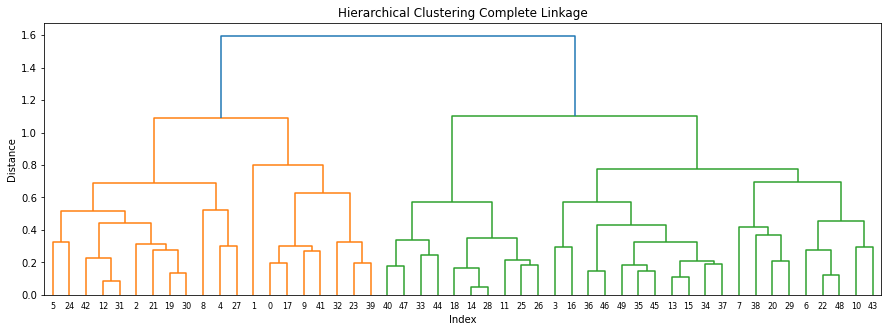

In [249]:
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Complete Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
              )
plt.show()

### Average Linkage

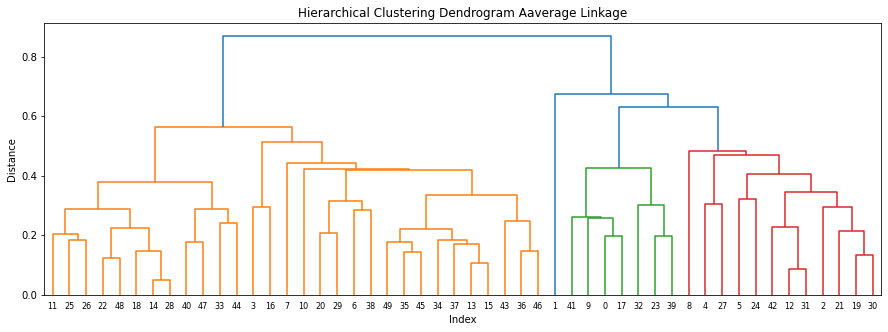

In [250]:
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram Aaverage Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,)  # font size for the x axis labels)
plt.show()

### Centroid Linkage

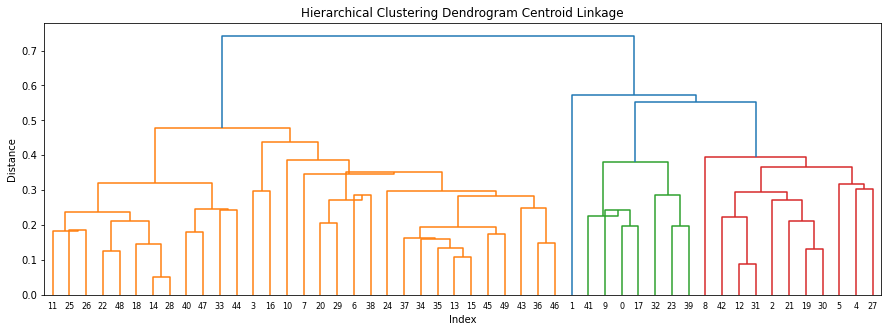

In [251]:
z = linkage(df_norm, method="centroid",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram Centroid Linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8., ) # font size for the x axis labels
plt.show()

## Create Cluster using Agglomerative Clustering

In [144]:
from sklearn.cluster import AgglomerativeClustering 
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
# Affinity -> type of clustering used (Euclidean)
# single linkage is used
# n_clusters=5 -> Will make 5 cuts

In [145]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [146]:
Clusters.head()# Column( record, Cluster number)

,Clusters
0,0
1,3
2,0
3,0
4,0


In [147]:
df_norm['h_clusterid']= Clusters #Storing it in df_norm
df_norm.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0


### Sorting Values of cluster in Ascending Form

In [148]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
27,0.686747,0.708904,0.830508,1.000000,0
28,0.078313,0.041096,0.406780,0.056848,0
29,0.397590,0.390411,0.966102,0.297158,0
30,0.638554,0.821918,0.644068,0.640827,0
31,0.620482,0.715753,0.915254,0.485788,0
32,0.734940,1.000000,0.220339,0.227390,0
33,0.000000,0.000000,0.203390,0.000000,0
34,0.391566,0.256849,0.728814,0.364341,0
35,0.349398,0.363014,0.610169,0.328165,0


C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h_clusterid', ylabel='count'>

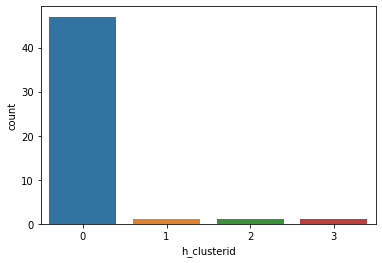

In [149]:
import seaborn as sns
sns.countplot(df_norm["h_clusterid"])

In [259]:
import sklearn.metrics as sm
y_hc = hc.fit_predict(df_norm)
sm.accuracy_score(y_hc,Clusters)

1.0

# K-means

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
crime2= pd.read_csv("crime_data.csv")
crime2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Using StandardScalar Function

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = pd.DataFrame(scaler.fit_transform(crime2.iloc[:,1:]))
scaled_crime.head()

In [20]:
crime2.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


**There is a Strong positive correlation between occurrence of Murder and Assault in different states.**

### Elbow Plot / Screw Plot

In [37]:
k = list(range(1,11))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [38]:
from scipy.spatial.distance import cdist 

TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    clf = KMeans(n_clusters = i)
    clf.fit(scaled_crime)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(scaled_crime.iloc[clf.labels_==j,:],clf.cluster_centers_[j].reshape(1,scaled_crime.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    

([<matplotlib.axis.XTick at 0x2203960a7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

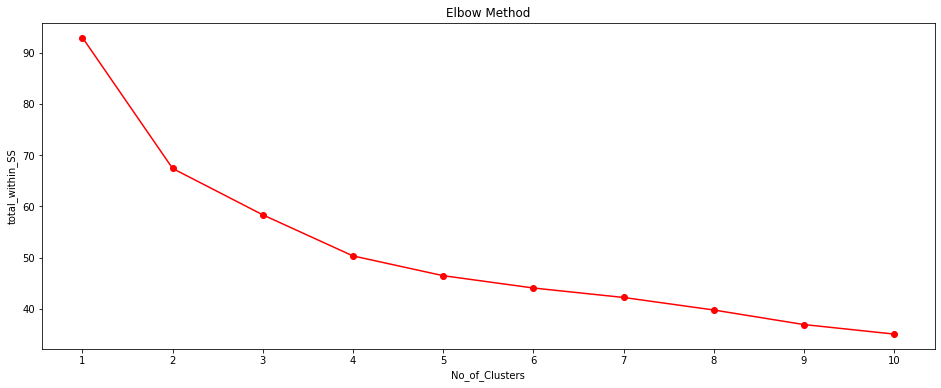

In [39]:
#Plotting
import matplotlib.pylab as plt 
plt.figure(figsize=(16,6))
plt.title('Elbow Method')
plt.plot(k,TWSS,'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k)


**Inference:**<br/>
**The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.**

In [40]:
# Selecting 4 clusters from the above elbow plot which is the optimum number of clusters 
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [41]:
clusters_new.labels_ # getting the labels of clusters assigned to each row

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [42]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [43]:
#beginning of  the cluster numbering with 1 instead of 0
clusters_new.labels_=clusters_new.labels_+1
clusters_new.labels_

array([1, 4, 4, 1, 4, 4, 2, 2, 4, 1, 2, 3, 4, 2, 3, 2, 3, 1, 3, 4, 2, 4,
       3, 1, 4, 3, 3, 4, 3, 2, 4, 4, 1, 3, 2, 2, 2, 2, 2, 1, 3, 1, 4, 2,
       3, 2, 2, 3, 3, 2])

In [1]:
#Assign clusters to the data set 

crime2['clusterid_new'] = clusters_new.labels_
crime2.head()

NameError: name 'clusters_new' is not defined

### Using groupby() function

In [45]:
round(crime2.groupby('clusterid_new').agg(['mean']),2).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,1,13.94,243.62,53.75,21.41
1,2,5.66,138.88,73.88,18.78
2,3,3.60,78.54,52.08,12.18
3,4,10.82,257.38,76.00,33.19


In [46]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime2.groupby('clusterid_new').mean(),2))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
clusterid_new,,,,
1,13.94,243.62,53.75,21.41
2,5.66,138.88,73.88,18.78
3,3.60,78.54,52.08,12.18
4,10.82,257.38,76.00,33.19


**Cluster 3: stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes**<br/>
**Cluster 4: As per summary we can say Cluster 4 have the higher rate of crime.**<br/>


<AxesSubplot:xlabel='Assault', ylabel='Murder'>

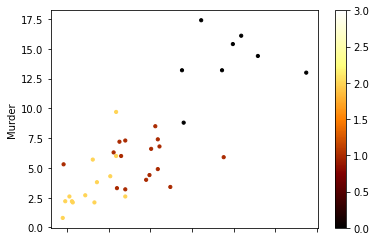

In [176]:
import matplotlib.pylab as plt 
crime2.plot(x="Assault", y="Murder", c=clusters_new.labels_,kind="scatter",s=10,cmap=plt.cm.afmhot)

**The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults.**

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

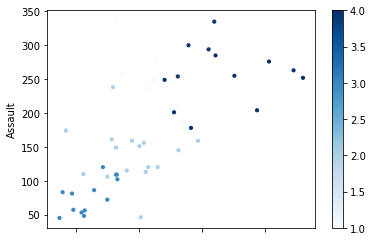

In [49]:
crime2.plot(x="Rape", y="Assault", c=clusters_new.labels_,kind="scatter",s=10,cmap=plt.cm.Blues)

**The above scatter shows a distribution of how the states are scattered and clusters are visible based on Rape and Assaults.**

<AxesSubplot:xlabel='Rape', ylabel='Murder'>

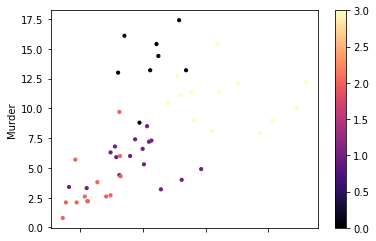

In [178]:
crime2.plot(x="Rape", y="Murder", c=clusters_new.labels_,kind="scatter",s=10,cmap=plt.cm.magma)

**The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Rape.**

### 2nd Way

In [116]:
from sklearn.cluster import KMeans

In [117]:
X = crime2[['Murder', 'Assault', 'Rape', 'UrbanPop']]
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [118]:
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X ) #Fitted directly column value without using standard scalar values
clusters.cluster_centers_
clusters.labels_
X['Crime_clusters'] = clusters.labels_
X.head()

<ipython-input-118-7e3619f9d96c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Crime_clusters'] = clusters.labels_


,Murder,Assault,Rape,UrbanPop,Crime_clusters
0,13.2,236,21.2,58,2
1,10.0,263,44.5,48,2
2,8.1,294,31.0,80,2
3,8.8,190,19.5,50,1
4,9.0,276,40.6,91,2


In [119]:
X.sort_values(by=['Crime_clusters'],ascending = True)

,Murder,Assault,Rape,UrbanPop,Crime_clusters
47,5.7,81,9.3,39,0
22,2.7,72,14.9,66,0
48,2.6,53,10.8,66,0
44,2.2,48,11.2,32,0
28,2.1,57,9.5,56,0
14,2.2,56,11.3,57,0
40,3.8,86,12.8,45,0
18,2.1,83,7.8,51,0
10,5.3,46,20.2,83,0
33,0.8,45,7.3,44,0


### Pair Plot between Murder~ Assault

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


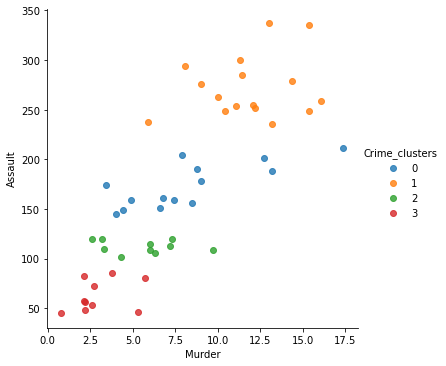

In [107]:
# Plot between pairs Murder~Assault
import seaborn as sns
sns.lmplot( 'Murder','Assault',  data=X,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

### Pair Plot between Murder~Rape

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


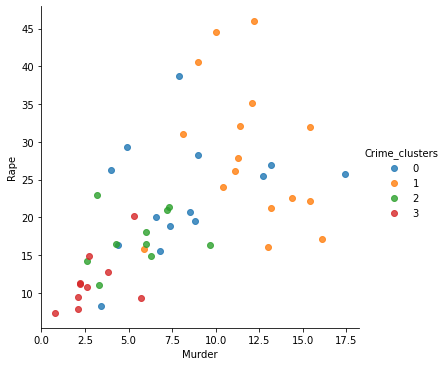

In [108]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=X,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5 );

### Pair Plot between pairs Assault~Rape

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


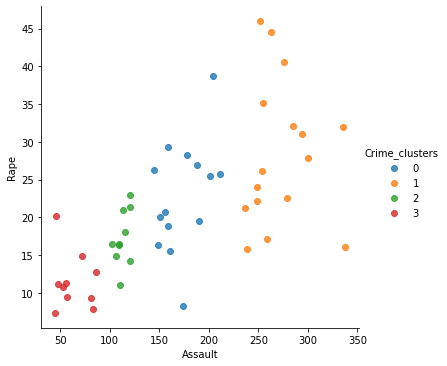

In [109]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=X,
        hue = 'Crime_clusters',
        fit_reg=False, size = 5);

**All dots are states of US and different colors are one cluster showing clustering for the crime data.**

# DBSCAN

In [60]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv");
print(df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [51]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [55]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) #dropping Unnamed 
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [56]:
# Store in array
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [58]:
stscaler = StandardScaler().fit(array) #standardize 
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [103]:
dbscan = DBSCAN(eps=1.2, min_samples=6)# DBSCAN is imported from sklearn
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=6)

In [104]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [105]:
# Converting labels into column named-> cluster
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [106]:
cl

,cluster
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,0
8,-1
9,-1


In [107]:
#concatenated row and col
pd.concat([df,cl],axis=1) 

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [108]:
clustered=pd.concat([df,cl],axis=1)

In [109]:
clustered[clustered['cluster']== -1] #total outlier

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
12,10.4,249,83,24.0,-1
17,15.4,249,66,22.2,-1
19,11.3,300,67,27.8,-1


In [110]:
#Storing outliers Noise in c
c= clustered['cluster']== -1 

In [111]:
c.value_counts() #Total number of outliers is 360

False    32
True     18
Name: cluster, dtype: int64

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

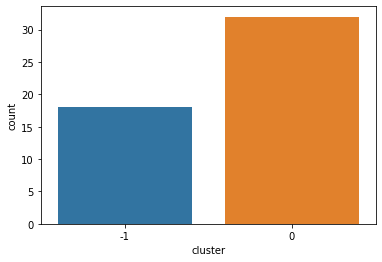

In [112]:
import seaborn as sns
sns.countplot(clustered["cluster"])

In [92]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.020
dtype: float64